# Discovering Partial Periodic Pattern in Big Data Using PPPGrowth Algorithm

In this tutorial, we will discuss the first approach to find Partial Periodic Pattern in big data using PPPGrowth (3PGrowth) algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover Partial Periodic Pattern using a single minimum support value


***

## <a id='basicApproach'>Basic approach: Executing PPPGrowth on a single dataset at a particular minimum support value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

#### Step 1: Import the PPPGrowth algorithm

In [1]:
from PAMI.partialPeriodicPattern.basic import PPPGrowth  as alg

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv'
periodCount = 5000
periodicSupportCount = 100  #Users can also specify this constraint between 0 to 1.

seperator='\t'       

#### Step 3: Execute the PPPGrowth algorithm

In [3]:
obj = alg.PPPGrowth(iFile=inputFile,periodicSupport=periodicSupportCount, period=periodCount, sep=seperator)    #initialize
obj.startMine()            #Start the mining process

Partial Periodic Patterns were generated successfully using 3PGrowth algorithm 


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [4]:
obj.save(outFile='partialPeriodicPatternsMinSupCount1000.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [5]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns 

In [6]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 27162


##### Step 5.2: Runtime consumed by the mining algorithm

In [7]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 13.475618839263916


##### Step 5.3: Total Memory consumed by the mining algorithm

In [9]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 576389120
Memory (USS): 538152960


# Advanced Tutorial on Implementing PPPGrowth Algorithm

In this tutorial, we will discuss the second approach to find Partial Periodic Pattern in big data using PPPGrowth (3PGrowth) algorithm.

[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover Partial Periodic Pattern using multiple minimum support values.

***

#### In this tutorial, we explain how the PPPGrowth algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the PPPGrowth algorithm and pandas data frame

In [1]:
from PAMI.partialPeriodicPattern.basic import PPPGrowth  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv'
seperator = '\t'
periodCount = 5000
periodicSupportCountList = [100, 150, 200, 250, 300]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

result = pd.DataFrame(columns=['algorithm', 'minSup', 'period','patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of PPPGrowth algorithm

#### Step 3: Execute the PPPGrowth algorithm using a for loop

In [3]:
algorithm = 'PPPGrowth'  #specify the algorithm name
for periodicSupportCount in periodicSupportCountList:
    obj = alg.PPPGrowth('https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv', periodicSupport=periodicSupportCount, period=periodCount, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, periodicSupportCount,periodCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

Partial Periodic Patterns were generated successfully using 3PGrowth algorithm 
Partial Periodic Patterns were generated successfully using 3PGrowth algorithm 
Partial Periodic Patterns were generated successfully using 3PGrowth algorithm 
Partial Periodic Patterns were generated successfully using 3PGrowth algorithm 
Partial Periodic Patterns were generated successfully using 3PGrowth algorithm 


#### Step 4: Print the result

In [4]:
print(result)

   algorithm  minSup  period  patterns    runtime     memory
0  PPPGrowth     100    5000     27162  17.409416  577286144
1  PPPGrowth     150    5000     18977  16.247539  574623744
2  PPPGrowth     200    5000     13150  15.139839  572116992
3  PPPGrowth     250    5000      7627  14.257152  568352768
4  PPPGrowth     300    5000      4506  12.911864  565395456


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [5]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

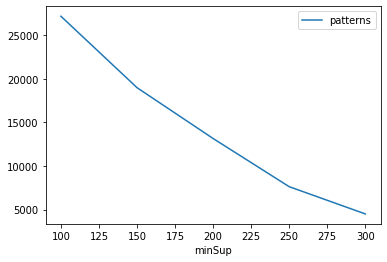

Graph for No Of Patterns is successfully generated!


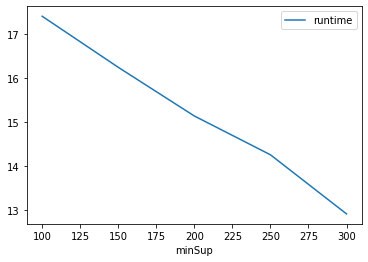

Graph for Runtime taken is successfully generated!


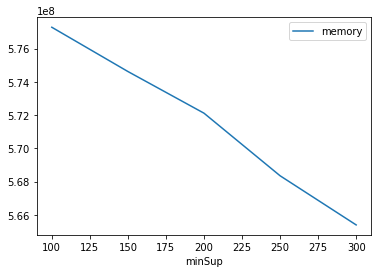

Graph for memory consumption is successfully generated!


In [6]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [7]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
